In [1]:
#%pip install cartopy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


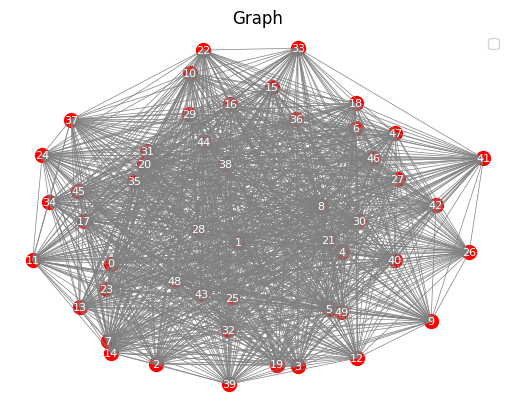

In [2]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

        
# cities = [
#     "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
#     "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
#     "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
#     "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
#     "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
#     "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
#     "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
#     "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
# ]
# cities = ["Rouen", "Saint-Etienne-Du-Rouvray","Mont-Saint-Aignan", "Bonsecours"]

# cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
# cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]
#create real graph
# graph = MapGraph(cities=cities,start_city="Rouen")
graph = RandomGraph(node_number=50,min_weight=1,max_weight=100)
graph.plot_graph()

In [3]:
#Filtration
edge_blocking_percentage = 0
edge_costly_percentage = 0
graph.apply_edge_blocking(percentage=edge_blocking_percentage)
graph.apply_edge_costly(percentage=edge_costly_percentage)

if(edge_blocking_percentage > 0 or edge_costly_percentage > 0):
    graph.plot_graph()

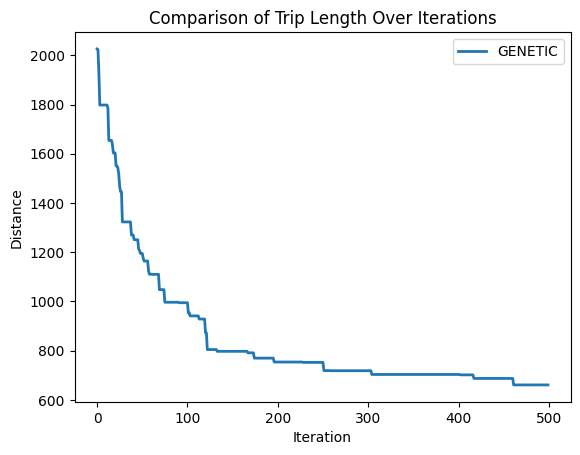

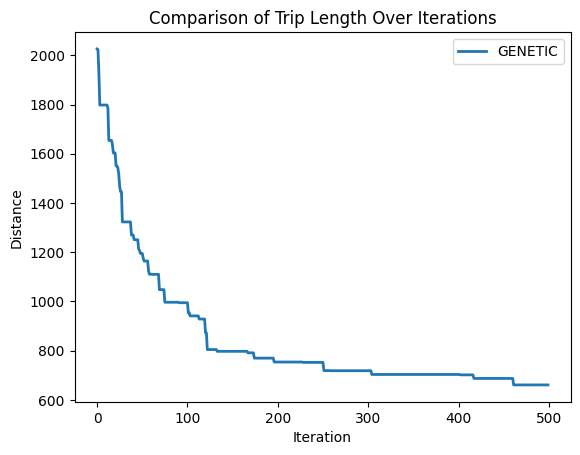

In [4]:
import sys

if "Algorithms.ACO.AcoAlgo" in sys.modules:
    del sys.modules["Algorithms.ACO.AcoAlgo"]
if "Algorithms.Greedy.GreedyAlgo" in sys.modules:
    del sys.modules["Algorithms.Greedy.GreedyAlgo"]
if "Algorithms.Tabu.TabuAlgo" in sys.modules:
    del sys.modules["Algorithms.Tabu.TabuAlgo"]
if "Algorithms.Genetic.GeneticAlgo" in sys.modules:
    del sys.modules["Algorithms.Genetic.GeneticAlgo"]

from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm,plot_path = True):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    algorithms_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    
    # Print the best path found and the total distance
    print(f"Execution time : {algorithm.execution_time} s ({algorithm.execution_time * 1000} ms)")
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Distance per vehicles  : {algorithm.distance_per_vehicles}")
    print(f"Average distance for each vehicles : {algorithm.distance_average_per_vehicles}")
    print(f"Standard deviation distance for each vehicles : {algorithm.distance_standard_deviation_per_vehicles}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    if plot_path:
        graph.plot_graph(current_path_results)

def time_over_iterations_comparison(graph,algorithms, max_iterations, step = 1, single_plot = True, full_plot = True):
    time_results = {algo.name: [] for algo in algorithms}
    iteration_range = range(1, max_iterations + 1, step)
    for algorithm in algorithms:
        algorithm.convergence_threshold = 0
        for i in iteration_range:
            algorithm.max_iterations = i
            algorithm.min_iterations = i
            algorithm.run()
            time_results[algorithm.name].append(algorithm.execution_time)
            print(f"{algorithm.name} - Iterations: {i} of {max_iterations}, Time: {algorithm.execution_time}s")
        if single_plot:
            single_time_result = {}
            single_time_result[algorithm.name] = time_results[algorithm.name]
            Plot.plot_time_over_iterations_comparison(single_time_result,step)
    if full_plot:
        Plot.plot_time_over_iterations_comparison(time_results,step)

def distance_over_iterations_comparison(graph,algorithms, single_plot = True, full_plot = True, plot_path_single = True, full_path_plot = False):
    algorithms_distance_results = {}
    for algorithm in algorithms:
        algorithm.run()
        algorithms_distance_results[algorithm.name] = algorithm.distance_history
        if single_plot:
            single_distance_results = {}
            single_distance_results[algorithm.name] = algorithm.distance_history
            Plot.plot_distance_over_iterations_comparison(single_distance_results)
    if full_plot:
        Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

# def run_algorithms(graph, algorithms):
#     for algorithm in algorithms:
#         run_algorithm(graph,algorithm)
#     Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
#     graph.plot_graph(algorithms_path_results)
min_iterations = 500
max_iterations = 500
convergence_threshold = 100
num_vehicles = 1
ACO = AcoAlgo(graph,"ACO",num_vehicles,100,0.5,1,2,min_iterations,max_iterations,convergence_threshold)
GREEDY = GreedyAlgo(graph,"GREEDY",num_vehicles,min_iterations,max_iterations,convergence_threshold)
TABU = TabuAlgo(graph,"TABU",num_vehicles,10,min_iterations,max_iterations,convergence_threshold)
GENETIC = GeneticAlgo(graph, "GENETIC",num_vehicles,100,min_iterations=min_iterations, max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [GENETIC]
# run_algorithms(graph= graph,algorithms=algorithms)
# graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
# time_over_iterations_comparison(graph,algorithms,max_iterations=1000, step=100)
distance_over_iterations_comparison(graph,algorithms)


Test: V2 S5 I50 C3 M0.08
Test: V2 S5 I50 C3 M0.09
Test: V2 S5 I50 C3 M0.1
Test: V2 S5 I50 C3 M0.11
Test: V2 S5 I50 C3 M0.12
Test: V2 S5 I50 C3 M0.13
Test: V2 S5 I50 C6 M0.08
Test: V2 S5 I50 C6 M0.09
Test: V2 S5 I50 C6 M0.1
Test: V2 S5 I50 C6 M0.11
Test: V2 S5 I50 C6 M0.12
Test: V2 S5 I50 C6 M0.13
Test: V2 S5 I50 C9 M0.08
Test: V2 S5 I50 C9 M0.09
Test: V2 S5 I50 C9 M0.1
Test: V2 S5 I50 C9 M0.11
Test: V2 S5 I50 C9 M0.12
Test: V2 S5 I50 C9 M0.13
Test: V2 S5 I50 C12 M0.08
Test: V2 S5 I50 C12 M0.09
Test: V2 S5 I50 C12 M0.1
Test: V2 S5 I50 C12 M0.11
Test: V2 S5 I50 C12 M0.12
Test: V2 S5 I50 C12 M0.13
Test: V2 S5 I50 C15 M0.08
Test: V2 S5 I50 C15 M0.09
Test: V2 S5 I50 C15 M0.1
Test: V2 S5 I50 C15 M0.11
Test: V2 S5 I50 C15 M0.12
Test: V2 S5 I50 C15 M0.13
Test: V2 S5 I100 C3 M0.08
Test: V2 S5 I100 C3 M0.09
Test: V2 S5 I100 C3 M0.1
Test: V2 S5 I100 C3 M0.11
Test: V2 S5 I100 C3 M0.12
Test: V2 S5 I100 C3 M0.13
Test: V2 S5 I100 C6 M0.08
Test: V2 S5 I100 C6 M0.09
Test: V2 S5 I100 C6 M0.1
Test: V2 S5

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


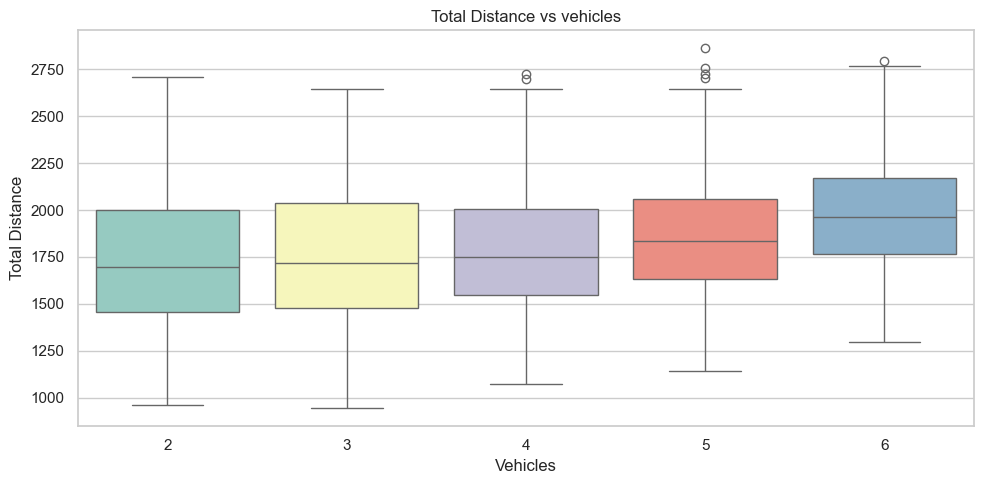

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


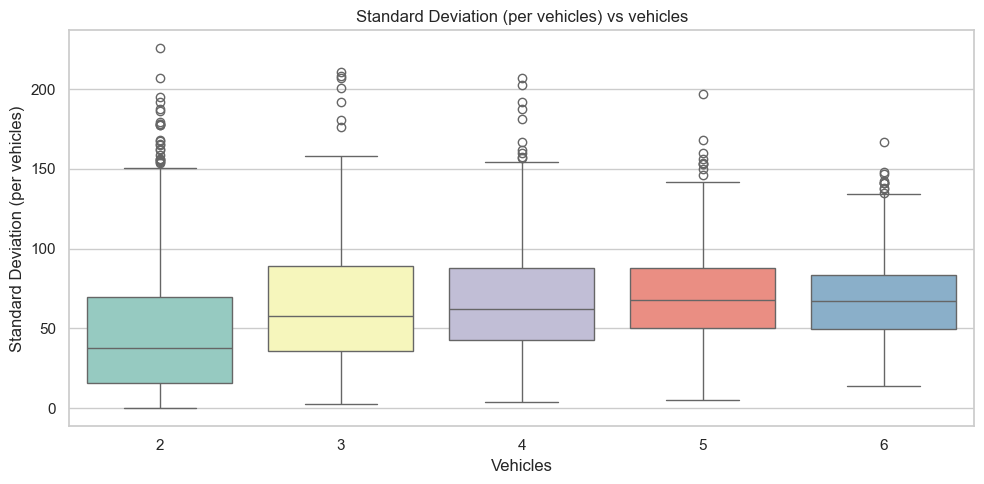

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


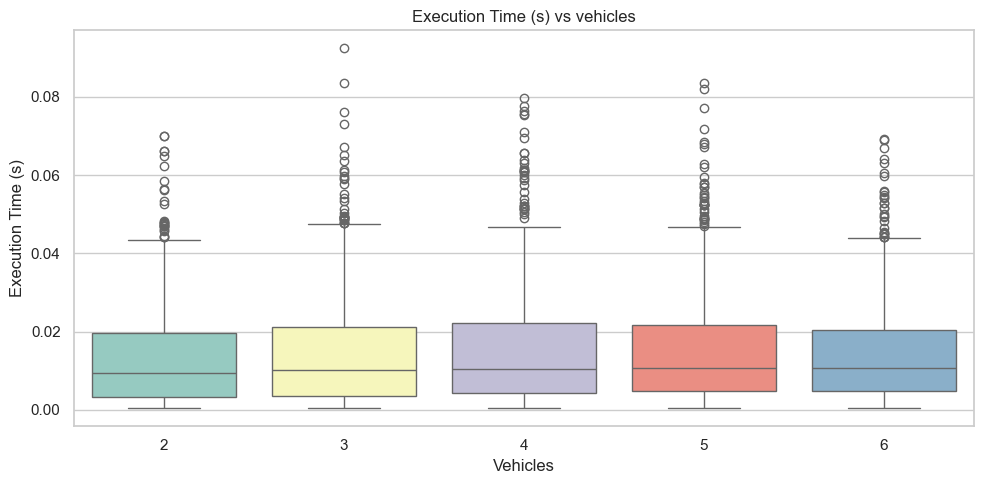

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


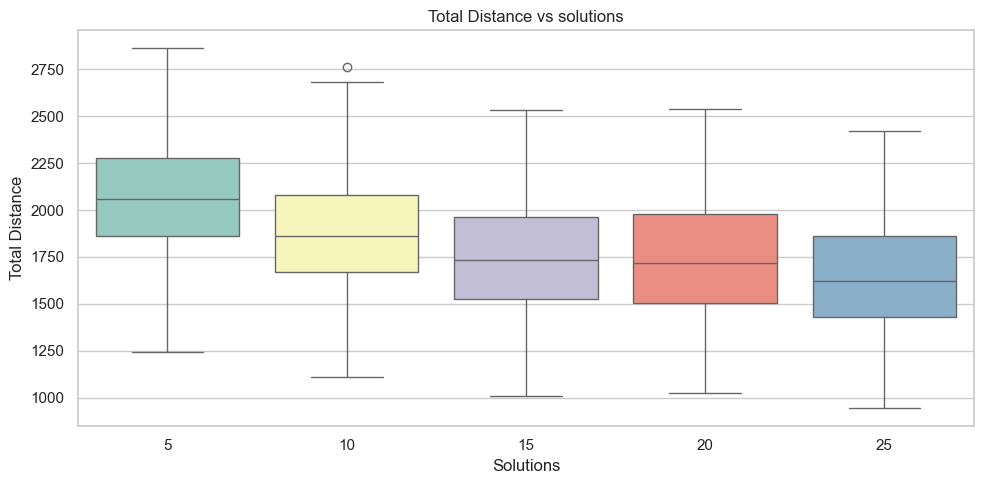

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


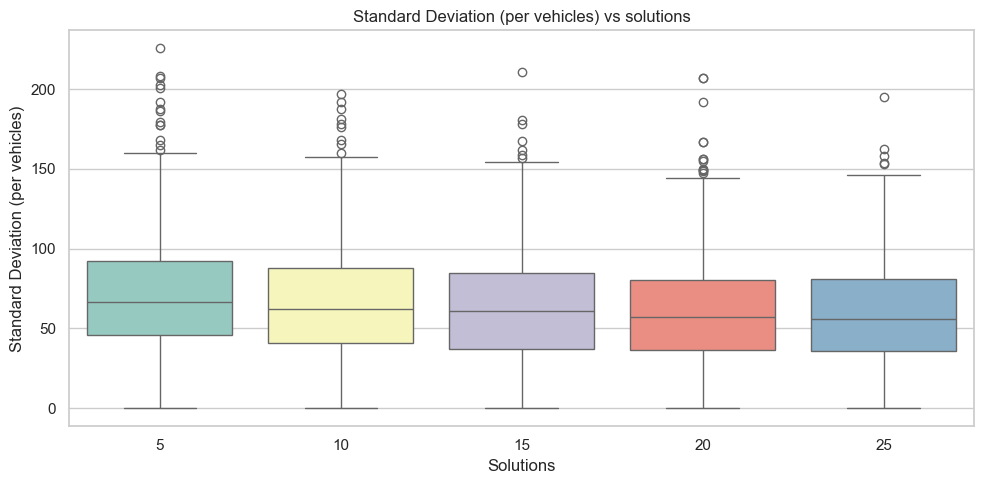

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


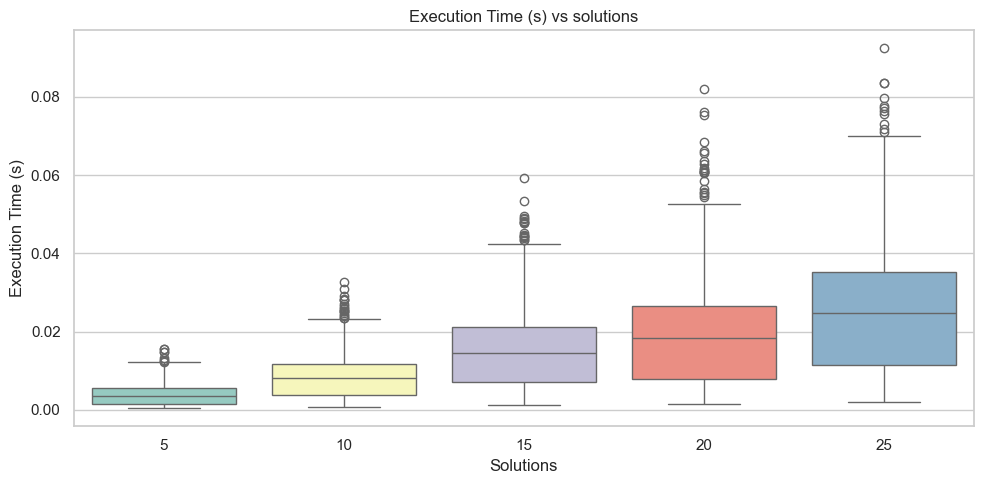

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


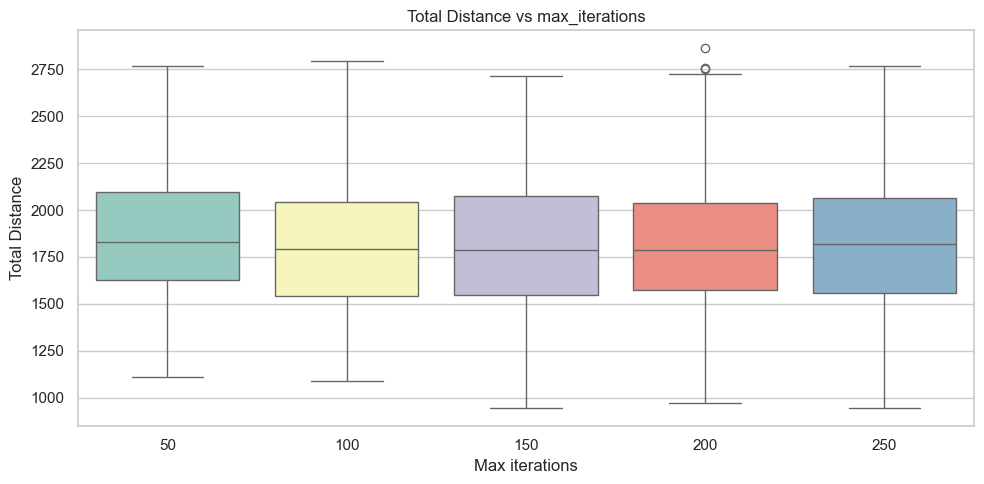

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


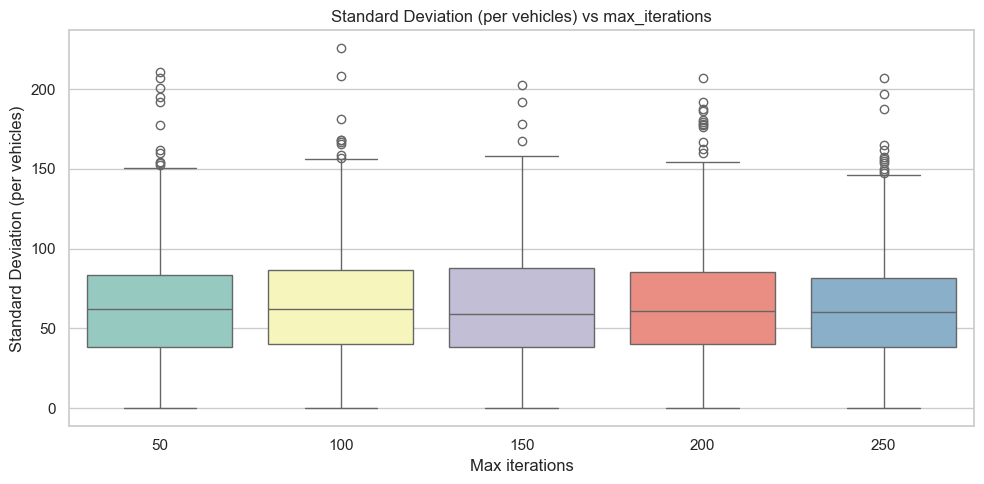

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


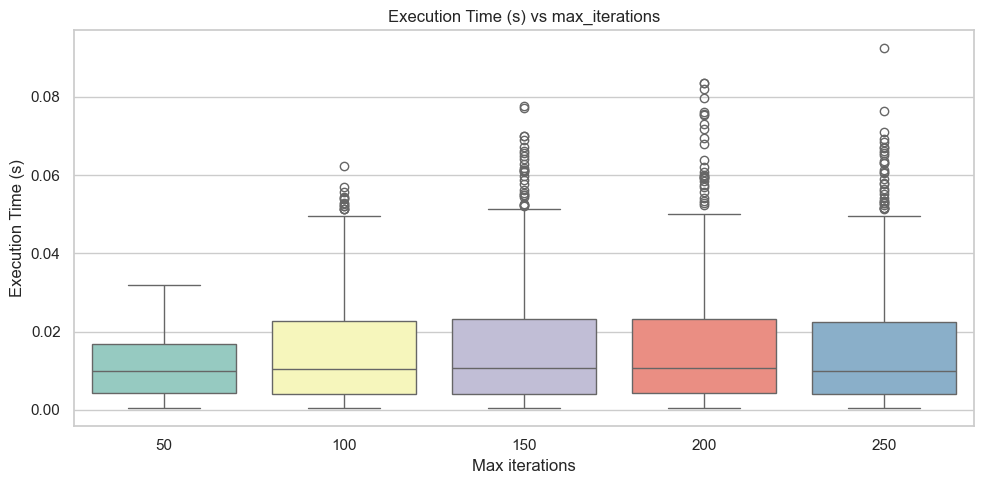

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


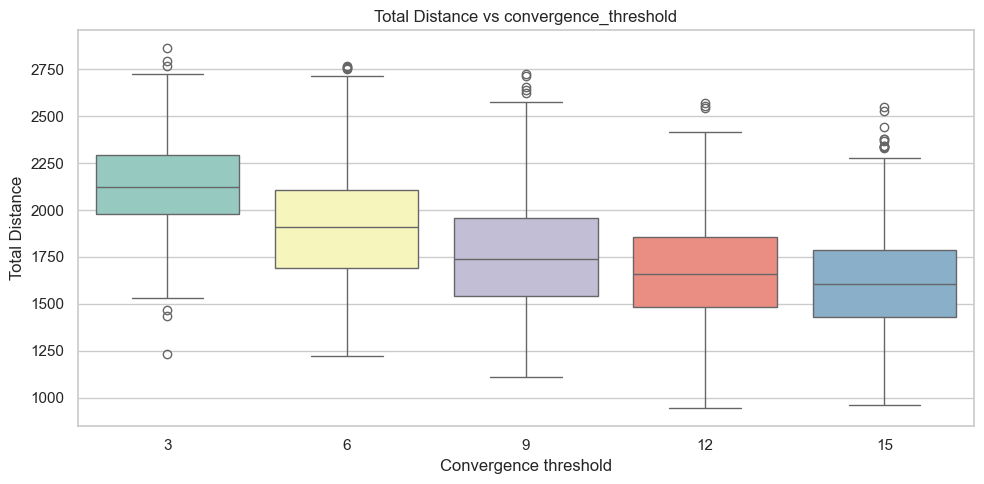

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


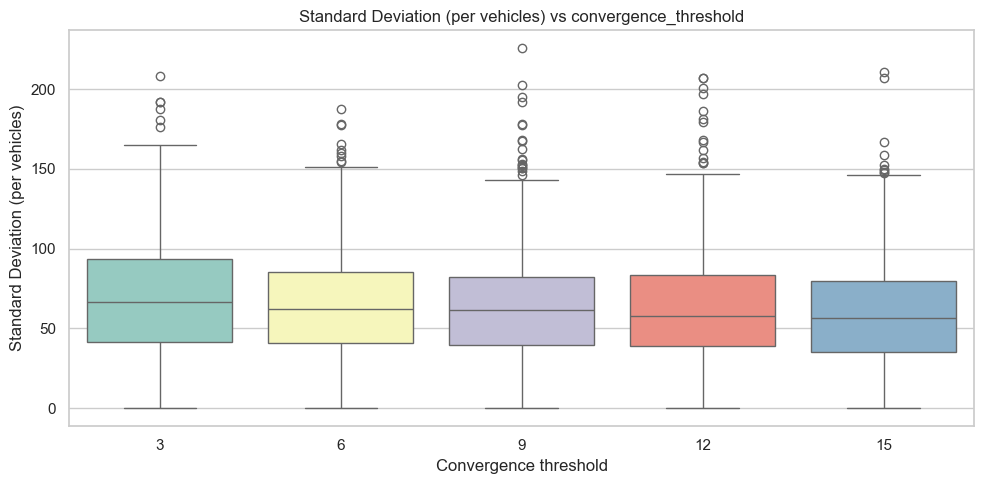

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


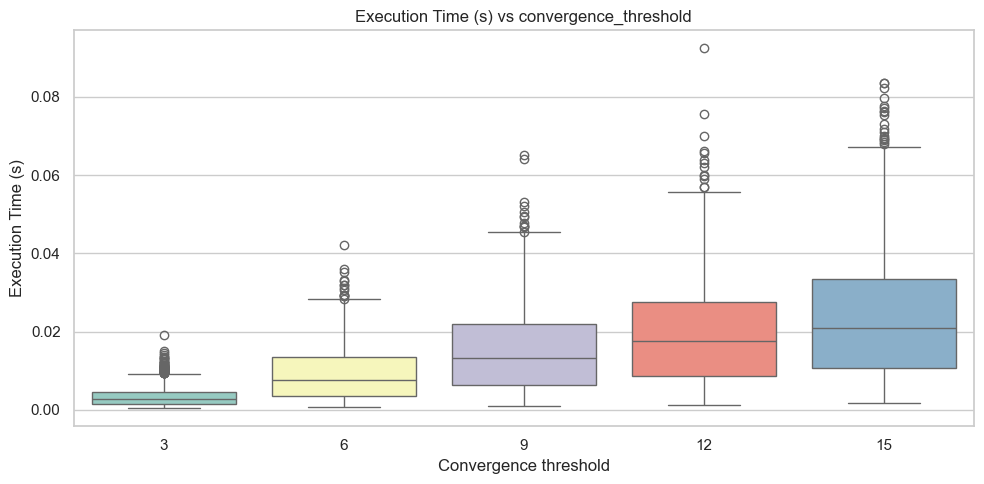

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


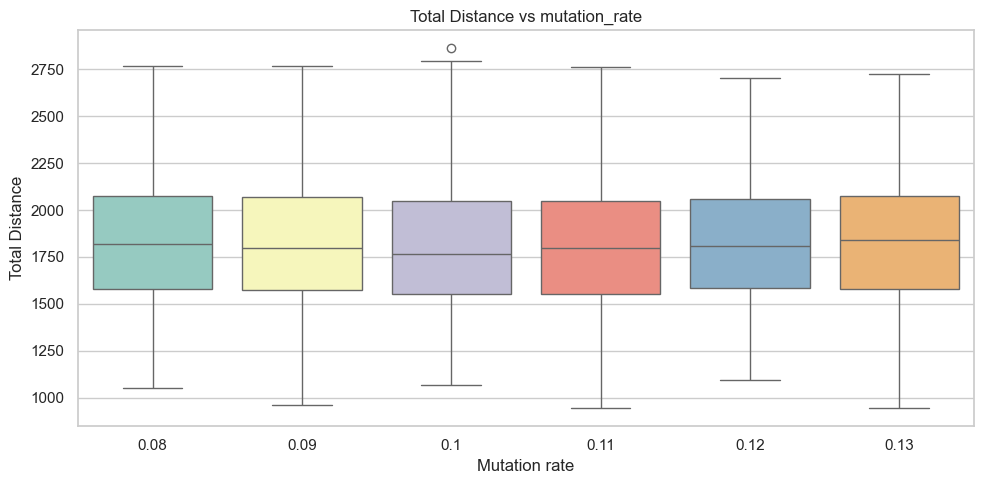

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


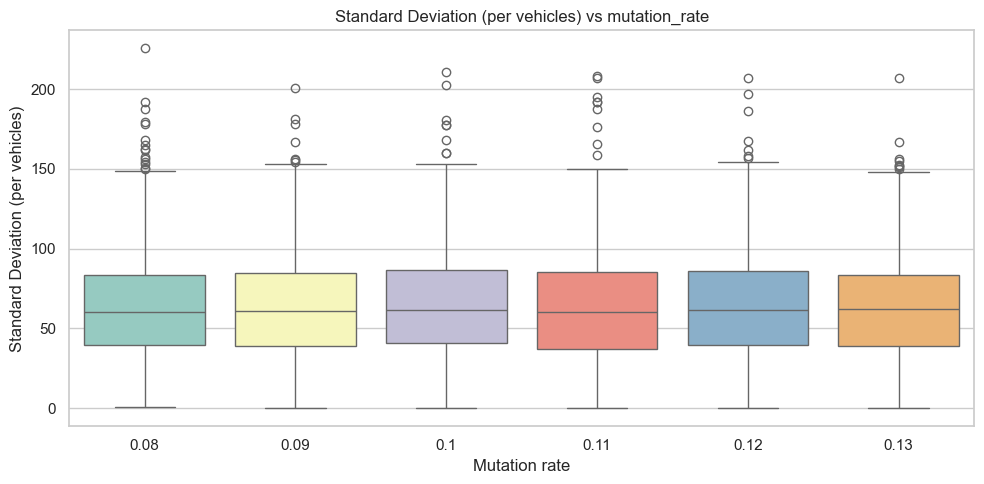

/var/folders/_v/1f8pbvfd18d0j9m1c0_bn_840000gn/T/ipykernel_27317/729527057.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=var, y=metric, palette="Set3")


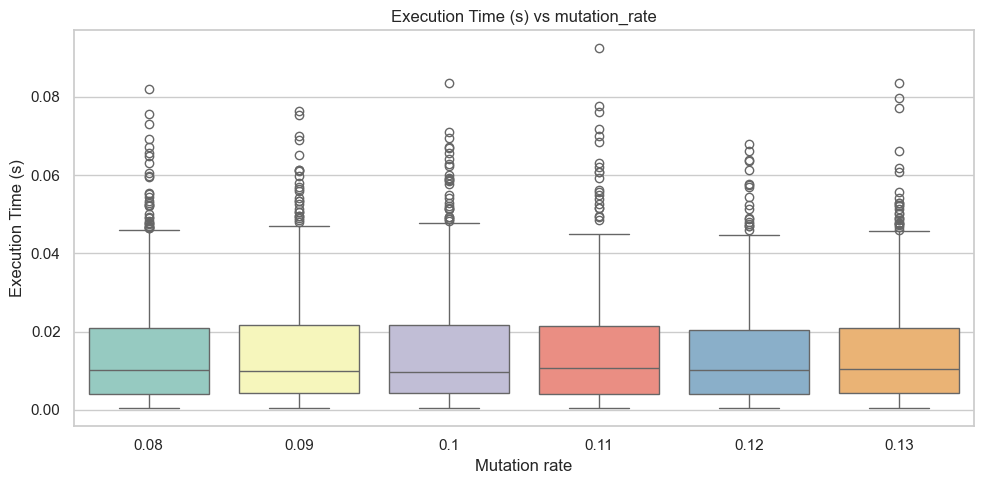

In [5]:
import pandas as pd
import seaborn as sns
import time
import matplotlib.pyplot as plt

# Réduire les options pour effectuer moins de tests
vehicle_options = list(range(2, 7))  # 5 options for vehicles
solution_options = list(range(5, 30, 5))  # 5 options for solutions in parallel
iteration_options = list(range(50, 300, 50))  # 5 options for max iterations
convergence_options = list(range(3, 18, 3))  # 5 options for convergence thresholds
mutation_rates = [i/100 for i in range(8,14)]

# Stockage des résultats
results = []

# Boucle sur toutes les combinaisons de paramètres
for num_vehicles in vehicle_options:
    for sol_parallel in solution_options:
        for max_iter in iteration_options:
            for conv_thresh in convergence_options:
                for mut_rate in mutation_rates:
                    print(f"Test: V{num_vehicles} S{sol_parallel} I{max_iter} C{conv_thresh} M{mut_rate}")
                    algo = GeneticAlgo(
                        graph=graph,
                        num_vehicles=num_vehicles,
                        solutions_in_parallel=sol_parallel,
                        max_iterations=max_iter,
                        convergence_threshold=conv_thresh,
                        mutation_rate=mut_rate
                    )
                    start = time.time()
                    algo.run()
                    end = time.time()
                    
                    results.append({
                        "vehicles": num_vehicles,
                        "solutions": sol_parallel,
                        "max_iterations": max_iter,
                        "convergence_threshold": conv_thresh,
                        "mutation_rate": mut_rate,
                        "total_distance": algo.distance,
                        "std_dev": algo.distance_standard_deviation_per_vehicles,
                        "time": end - start
                    })

# Création du DataFrame
df = pd.DataFrame(results)

# Affichage des graphiques pour chaque variable
sns.set(style="whitegrid")
variables = ["vehicles", "solutions", "max_iterations", "convergence_threshold", "mutation_rate"]
metrics = {
    "total_distance": "Total Distance",
    "std_dev": "Standard Deviation (per vehicles)",
    "time": "Execution Time (s)"
}

for var in variables:
    for metric, title in metrics.items():
        plt.figure(figsize=(10, 5))
        sns.boxplot(data=df, x=var, y=metric, palette="Set3")
        plt.title(f"{title} vs {var}")
        plt.xlabel(var.replace('_', ' ').capitalize())
        plt.ylabel(title)
        plt.tight_layout()
        plt.show()
